In [1]:
import h5py
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation


In [2]:
%tensorboard --logdir /home/jessica/personalized_driving_toyota/

UsageError: Line magic function `%tensorboard` not found.


In [2]:
def get_angles(seq):
    new_angles = []
    for i in range(1, len(seq)):
        rotation = Rotation.from_quat(seq[i][:4]).as_euler('zyx', degrees=True)    
        prev_rotation = Rotation.from_quat(seq[i-1][:4]).as_euler('zyx', degrees=True)       
        rot = rotation-prev_rotation
        new_angles.append(rot[0])
    new_angles.append(0)
    return np.array(new_angles)

In [17]:
data_path = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_train.hfd5"
data_path1 = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_train_medium_0-33.hfd5"
data_path2 = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_train_medium_34-59.hfd5"
data_path3 = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_train_medium_59-end.hfd5"
data_path4 = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_test.hfd5"
data_path5 = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_val.hfd5"
paths = [data_path, data_path1, data_path2, data_path3, data_path4, data_path5]
people_seqs = []
for data_path in paths:
            with h5py.File(data_path, "r") as f:
                for i, seq_key in enumerate(list(f.keys())):
                    person_seq = {}
                    keys_ = f[seq_key].keys()
                    for key in keys_:
                        if key == "angle": continue
                        seq = f[seq_key][key][()]#[0::subsample]
                        if key == "pos":
                            person_seq["pos"] = seq
                            seq = get_angles(seq)
                            person_seq["angle"] = seq
                            continue
                        person_seq[key] = seq
                    people_seqs.append(person_seq)

: 

: 

In [16]:
len(people_seqs)

25

In [14]:
for people_seq in people_seqs: 
    speeds = [-1]
    for i in range(1,len(people_seq['orig_times'])):# < 25# & people_seqs[0]['distance'] >=0
        time = people_seq['orig_times'][i]
        prev_time = people_seq['orig_times'][i-1]
        prev_time = people_seq['orig_times'][i-1]
        pos = people_seq['pos'][i][-3:]
        prev_pos = people_seq['pos'][i-1][-3:]
        speed = dist(pos, prev_pos)
        speed = speed/((time-prev_time)/60/60)
        speeds.append(speed)
    people_seq['speed'] = speeds

KeyError: 'pos'

In [12]:
import matplotlib.pyplot as plt

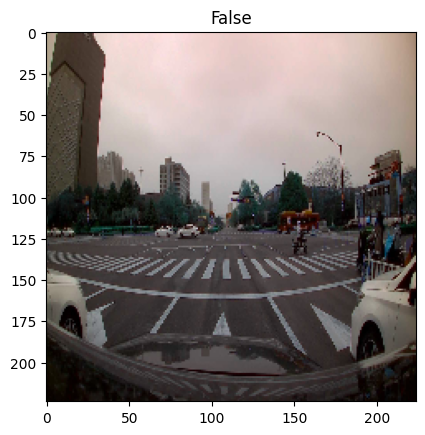

In [13]:
for elem in people_seqs:
    for i in range(len(elem['distance'])):
        plt.imshow(elem['image_array'][i])
        plt.title(elem['distance'][i] > 0 and elem['distance'][i] < 30)
        plt.savefig(f"{i}.png")
        if i > 100: break
    #print(np.array(elem['distance'] > 0) & np.array(elem['distance'] < 30))
    break

In [7]:
path ='/data1/jessica/data/toyota_preprocess/data/'

In [3]:
import cv2

vidcap = cv2.VideoCapture(path + 'video/video_camera1.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite(path+"frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [12]:
import pandas as pd
df = pd.read_csv(path+"processed_data/logs/log_ego-vehicle.txt", sep="  | ")

/tmp/ipykernel_4104667/2166773388.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path+"processed_data/logs/log_ego-vehicle.txt", sep="  | ")


In [60]:
df

,FunctionTimeStamp,gpsChainTimeMS,Lat,Lon,Ngps,Egps,CalidadGPS,posicionCocheAntenaN,posicionCocheAntenaE,Unnamed: 9,...,IMU_acc_z,IMU_gyr_x,IMU_gyr_y,IMU_gyr_z,IMU_pitch,IMU_roll,IMU_yaw,gyroBias,gpsWritingtime,posicionVolante
0,1529580070741561,0,4030.304996,320.372314,4483874.340,471231.7328,5,4483874.340,471231.7328,4483874.340,...,203,-4,59,-1,0,0,2710.19690,1.529580e+12,-10.3,NaN
1,1529580070741626,0,4030.304996,320.372314,4483874.340,471231.7328,5,4483874.340,471231.7328,4483874.340,...,203,-4,59,-1,0,0,2710.19690,1.529580e+12,-10.3,NaN
2,1529580070741667,0,4030.304996,320.372314,4483874.340,471231.7328,5,4483874.340,471231.7328,4483874.340,...,203,-4,59,-1,0,0,2710.19690,1.529580e+12,-10.3,NaN
3,1529580070741706,0,4030.304996,320.372314,4483874.340,471231.7328,5,4483874.340,471231.7328,4483874.340,...,203,-4,59,-1,0,0,2710.19690,1.529580e+12,-10.3,NaN
4,1529580070741744,0,4030.304996,320.372314,4483874.340,471231.7328,5,4483874.340,471231.7328,4483874.340,...,203,-4,59,-1,0,0,2710.19690,1.529580e+12,-10.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246094,1529582530145000,43291500,4030.692058,320.524379,4484591.237,471019.7751,4,4484591.241,471019.7672,4484591.241,...,-30,1059,94,-1,0,0,0.00681,1.529583e+12,2.0,NaN
246095,1529582530155026,43291550,4030.692058,320.524375,4484591.235,471019.7798,4,4484591.241,471019.7673,4484591.241,...,-30,1059,94,-1,0,0,0.00681,1.529583e+12,2.0,NaN
246096,1529582530164983,43291550,4030.692058,320.524375,4484591.235,471019.7798,4,4484591.241,471019.7673,4484591.241,...,-30,1059,94,-1,0,0,0.00681,1.529583e+12,2.0,NaN
246097,1529582530174959,43291550,4030.692058,320.524375,4484591.235,471019.7798,4,4484591.241,471019.7673,4484591.241,...,-30,1059,94,-1,0,0,0.00681,1.529583e+12,2.0,NaN


In [49]:
df2 = pd.read_csv(path+"processed_data/logs/log_camera1.txt", sep="  | ", dtype="str")

/tmp/ipykernel_4104667/2980743555.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv(path+"processed_data/logs/log_camera1.txt", sep="  | ", dtype="str")


In [50]:
df2.columns=["0","1","2","3"]

In [51]:
df2

,0,1,2,3
0,00000000001,00000000001,40927722339,40927722675
1,00000000002,00000000002,40927807818,40927807921
2,00000000003,00000000003,40927893307,40927893745
3,00000000004,00000000004,40927978788,40927979001
4,00000000005,00000000005,40928064271,40928064809
...,...,...,...,...
23839,00000023840,00000023840,42983131387,42983131443
23840,00000023841,00000023841,42983217451,42983217863
23841,00000023842,00000023842,42983303508,42983303726
23842,00000023843,00000023843,42983389575,42983390139


In [15]:
import os 
l = os.listdir(path+'video')

In [16]:
import rawpy
import imageio

path = 'video_camera1.raw'
raw = rawpy.imread(path)
rgb = raw.postprocess()
imageio.imsave('default.tiff', rgb)

34183

In [25]:
import rawpy
import numpy as np

In [26]:
with open(path+ 'video_camera1.raw', 'rb') as f:
        data_array = np.fromfile(f, np.int16)

In [59]:
data_array.reshape((-1,1920,600)).shape

(15436, 1920, 600)